## **MODEL TRAINING**

In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import joblib
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score 
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [13]:
# Load feature-engineered dataset
df = pd.read_csv("D:\\Solarpowerprediction\\Data\\processed_data.csv")


In [14]:
# Split data into features (X) and target (y)
X = df.drop(columns=['generated_power_kw'])
y = df['generated_power_kw']

In [15]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3370, 20)
Testing data shape: (843, 20)


**STANDARDISATION**

In [16]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LINEAR REGRESSION**

In [17]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}, MAE: {mae_lr:.4f}")

#Save Model 
joblib.dump(lr_model, "linear_regression.pkl")
print(f"First Prediction: {y_pred_lr[0]:.4f} kw")
print("Linear Regression Model Saved Successfully ")


Linear Regression - RMSE: 507.5323, R²: 0.7180, MAE: 391.7927
First Prediction: 2005.3636 kw
Linear Regression Model Saved Successfully 


**RANDOM FOREST**

In [19]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}, MAE: {mae_rf:.4f}")


# Save Model
joblib.dump(rf_model, "random_forest.pkl")
print(f"First Prediction: {y_pred_rf[0]:.4f} kw")
print("Random Forest Model Saved Successfully")


Random Forest - RMSE: 407.6147, R²: 0.8181, MAE: 255.5427
First Prediction: 2273.4082 kw
Random Forest Model Saved Successfully


**HYPERPARAMETER TUNED MODEL**

In [21]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train best model
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate best model
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_rf)


print(f"Tuned Random Forest - RMSE: {rmse_best_rf:.4f}, R²: {r2_best_rf:.4f}, MAE: {mae_best_rf:.4f}")

#Save Model
joblib.dump(best_rf_model, "best_tuned_random_forest.pkl")
print(f"First Prediction: {y_pred_best_rf[0]:.4f} kw")
print(f"Best Random Forest Model Saved with Parameters")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest - RMSE: 404.5067, R²: 0.8209, MAE: 255.5427
First Prediction: 2275.8186 kw
Best Random Forest Model Saved with Parameters


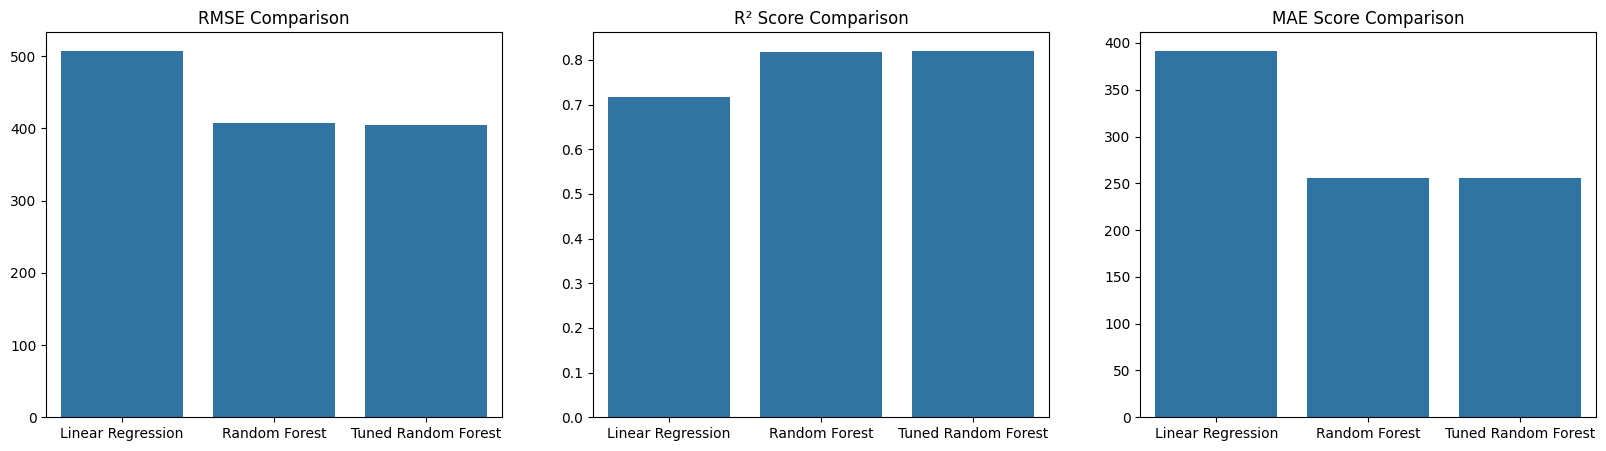

In [22]:
models = ["Linear Regression", "Random Forest", "Tuned Random Forest"]
rmse_scores = [rmse_lr, rmse_rf, rmse_best_rf]
r2_scores = [r2_lr, r2_rf, r2_best_rf]
mae_scores =[mae_lr,mae_rf,mae_best_rf]

plt.figure(figsize=(20, 5))
plt.subplot(1,3, 1)
sns.barplot(x=models, y=rmse_scores)
plt.title("RMSE Comparison")

plt.subplot(1,3, 2)
sns.barplot(x=models, y=r2_scores)
plt.title("R² Score Comparison")

plt.subplot(1,3,3)
sns.barplot(x=models, y=mae_scores)
plt.title("MAE Score Comparison")

plt.show()




In [23]:
#prediction 
print("Model predictions")
print(f"Prediction of Linear regression: {y_pred_lr[0]:.4f} kw")
print(f"Prediction of Random forest: {y_pred_rf[0]:.4f} kw")
print(f"Prediction of hyperparameter tuned random forest: {y_pred_best_rf[0]:.4f} kw")

print("--------------------------------------------------------------------------------")

#evaluation based on performance metric
print("Evaluation based on performance metric")
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}, MAE: {mae_lr:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}, MAE: {mae_rf:.4f}")
print(f"Tuned Random Forest - RMSE: {rmse_best_rf:.4f}, R²: {r2_best_rf:.4f}, MAE: {mae_best_rf:.4f}")


Model predictions
Prediction of Linear regression: 2005.3636 kw
Prediction of Random forest: 2273.4082 kw
Prediction of hyperparameter tuned random forest: 2275.8186 kw
--------------------------------------------------------------------------------
Evaluation based on performance metric
Linear Regression - RMSE: 507.5323, R²: 0.7180, MAE: 391.7927
Random Forest - RMSE: 407.6147, R²: 0.8181, MAE: 255.5427
Tuned Random Forest - RMSE: 404.5067, R²: 0.8209, MAE: 255.5427
